In [209]:
import decoupler as dc
import omnipath as op
import gdown
import shutil

In [207]:
url = 'https://zenodo.org/record/6337966/files/HLCA_reference_model.zip'
output = 'HLCA_reference_model.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://zenodo.org/record/6337966/files/HLCA_reference_model.zip
To: /root/host_home/single-cell-tutorial/HCA-Lung/HLCA_reference_model.zip
100%|████████████████████████████████████████████████████████████████| 5.32M/5.32M [00:12<00:00, 420kB/s]


'HLCA_reference_model.zip'

In [210]:
shutil.unpack_archive('HLCA_reference_model.zip')
os.remove(output)

NameError: name 'os' is not defined

In [2]:
# Query Omnipath and get PanglaoDB
markers = dc.get_resource('PanglaoDB')

In [3]:
# get genes_marker from epithelium
markers_ept = markers[(markers['mouse']=='True')&(markers['canonical_marker']=='True')&(markers['organ']=='Epithelium')]

# Remove duplicated entries
markers_ept = markers_ept[~markers_ept.duplicated(['cell_type', 'genesymbol'])]
print(markers_ept.shape)
markers_ept

(22, 13)


,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
64,MUC1,True,Epithelial cells,Mesoderm,True,0.382353,0.0291324,True,0.0,0.012537,9606,Epithelium,0.016
105,ANPEP,True,Epithelial cells,Mesoderm,True,0.176471,0.011083,True,0.0967742,0.016716,9606,Epithelium,0.015
521,CDH1,True,Epithelial cells,Mesoderm,True,0.294118,0.0389487,True,0.290323,0.05677,9606,Epithelium,0.056
559,MSLN,True,Mesothelial cells,Mesoderm,True,1.0,0.000626959,True,0.966667,0.00347155,9606,Epithelium,0.004
1650,KRT5,True,Basal cells,Mesoderm,True,0.66,0.0141354,True,1.0,0.0150154,9606,Epithelium,0.019
1665,KRT14,True,Basal cells,Mesoderm,True,0.293333,0.00624589,True,0.0,0.0191863,9606,Epithelium,0.019
1667,KRT14,True,Epithelial cells,Mesoderm,True,0.0,0.0199493,True,0.0,0.0192234,9606,Epithelium,0.019
1679,KRT6B,True,Basal cells,Mesoderm,True,0.24,0.00230112,True,0.0,0.00205339,9606,Epithelium,0.004
1759,LAMB3,True,Basal cells,Mesoderm,True,0.633333,0.0249836,True,1.0,0.00936858,9606,Epithelium,0.017
1770,KRT15,True,Basal cells,Mesoderm,True,0.633333,0.0190664,True,1.0,0.0172613,9606,Epithelium,0.022


In [4]:
# Filter markers by canonical_marker and mouse its different above
# markers = markers[(markers['mouse']=='True')&(markers['canonical_marker']=='True')&(markers['organ']=='Epithelium')]
markers = markers[(markers['mouse']=='True')&(markers['canonical_marker']=='True')]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
1,CTRB1,True,Acinar cells,Endoderm,True,1.0,0.000628931,True,0.957143,0.0159201,9606,Pancreas,0.017
2,KLK1,True,Acinar cells,Endoderm,True,0.833333,0.00503145,True,0.314286,0.0128263,9606,Pancreas,0.013
5,KLK1,True,Principal cells,Mesoderm,True,0.0,0.00814536,True,0.285714,0.0140583,9606,Kidney,0.013
7,KLK1,True,Plasmacytoid dendritic cells,Mesoderm,True,0.0,0.00820189,True,1.0,0.0129136,9606,Immune system,0.013
8,KLK1,True,Endothelial cells,Mesoderm,True,0.0,0.00841969,True,0.0,0.0149153,9606,Vasculature,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,SLC14A1,True,Urothelial cells,Mesoderm,True,0.0,0.0181704,True,0.0,0.0,9606,Urinary bladder,0.008
8473,UPK3A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8474,UPK1A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8475,UPK2,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0


In [ ]:
markers.to_csv('markers.csv')

In [ ]:
markers['cell_type'].describe()

In [ ]:
# get type cells unique
cell_type = pd.DataFrame(markers.cell_type.unique())

cell_type.to_csv('cell_type.csv')
cell_type.head()

In [ ]:
# filter by cell_types from our interest
markers = markers[(markers['cell_type']=='Paneth cells') | (markers['cell_type']=='Enterocytes') | (markers['cell_type']=='Enteroendocrine cells') | (markers['cell_type']=='Tuft cells') | (markers['cell_type']=='Pluripotent stem cells') | (markers['cell_type']=='Goblet cells')]
#markers = markers[markers['cell_type'] in ['Paneth cells', 'Enterocytes']]
markers

## Cell Marker 2.0

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [164]:
plt.style.use('ggplot')

In [165]:
dfOri = pd.read_excel('Cell_marker_Seq.xlsx')

In [166]:
# select only human and normal type
df_hum = dfOri[dfOri['species'] == 'Human']
df = df_hum[df_hum['cell_type'] == 'Normal cell']

In [6]:
df['marker']

0           FABP4
1         PDGFRα 
2            UCP1
22          FABP4
23       vimentin
           ...   
27068        LRG1
27069        EMCN
27070     COL15A1
27076        CD19
27077        CD19
Name: marker, Length: 12365, dtype: object

In [7]:
# this works, if works dont move
df['marker'] = df['marker'].apply(str.upper)

/tmp/ipykernel_49556/1081354799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marker'] = df['marker'].apply(str.upper)


In [8]:
df['marker']

0           FABP4
1         PDGFRΑ 
2            UCP1
22          FABP4
23       VIMENTIN
           ...   
27068        LRG1
27069        EMCN
27070     COL15A1
27076        CD19
27077        CD19
Name: marker, Length: 12365, dtype: object

In [9]:
df.head()

,species,tissue_class,tissue_type,uberonongology_id,cancer_type,cell_type,cell_name,cellontology_id,marker,Symbol,GeneID,Genetype,Genename,UNIPROTID,technology_seq,marker_source,PMID,Title,journal,year
0,Human,Abdomen,Abdominal fat pad,NaN,Normal,Normal cell,Brown adipocyte,CL_0000449,FABP4,FABP4,2167.0,protein_coding,fatty acid binding protein 4,E7DVW4,sci-RNA-seq,Experiment,32355218,Single-cell transcriptional networks in differ...,Nature communications,2020
1,Human,Abdomen,Abdominal fat pad,NaN,Normal,Normal cell,Brown adipocyte,CL_0000449,PDGFRΑ,NaN,NaN,NaN,NaN,NaN,sci-RNA-seq,Experiment,32355218,Single-cell transcriptional networks in differ...,Nature communications,2020
2,Human,Abdomen,Abdominal fat pad,NaN,Normal,Normal cell,Brown adipocyte,CL_0000449,UCP1,UCP1,7350.0,protein_coding,uncoupling protein 1,P25874,sci-RNA-seq,Experiment,32355218,Single-cell transcriptional networks in differ...,Nature communications,2020
22,Human,Adipose tissue,Adipose tissue,UBERON_0001013,Normal,Normal cell,Stem cell,CL_0000034,FABP4,FABP4,2167.0,protein_coding,fatty acid binding protein 4,E7DVW4,Single-cell sequencing,Experiment,30639037,Patient adipose stem cell-derived adipocytes r...,Cell stem cell,2019
23,Human,Adipose tissue,Adipose tissue,UBERON_0001013,Normal,Normal cell,Pan fibroblast,NaN,VIMENTIN,NaN,NaN,NaN,NaN,NaN,Single-cell sequencing,Experiment,31053654,Distinct immunocyte-promoting and adipocyte-ge...,Science immunology,2019


In [131]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='SNAI2') |
                                                                (df['marker']=='SULT1E1')|
                                                                (df['marker']=='GPC3')|
                                                                (df['marker']=='VCAN')|
                                                                (df['marker']=='TMSB15A')|
                                                                (df['marker']=='RBP1')|
                                                                (df['marker']=='MEST')]
df_temp

,species,tissue_type,cell_type,cell_name,marker
1711,Human,Blood,Normal cell,Monocyte,VCAN
2406,Human,Peripheral blood,Normal cell,Monocyte,VCAN
2905,Human,Peripheral blood,Normal cell,Classical monocyte,VCAN
4757,Human,Bone marrow,Normal cell,Monocyte,VCAN
5224,Human,Bone marrow,Normal cell,Monocyte,VCAN
5644,Human,Brain,Normal cell,Oligodendrocyte progenitor cell,VCAN
6666,Human,Cortex,Normal cell,Oligodendrocyte,VCAN
6688,Human,Brain,Normal cell,Neuron,VCAN
7780,Human,Brain,Normal cell,Oligodendrocyte precursor cell,VCAN
7992,Human,Brain,Normal cell,Oligodendrocyte progenitor cell,VCAN


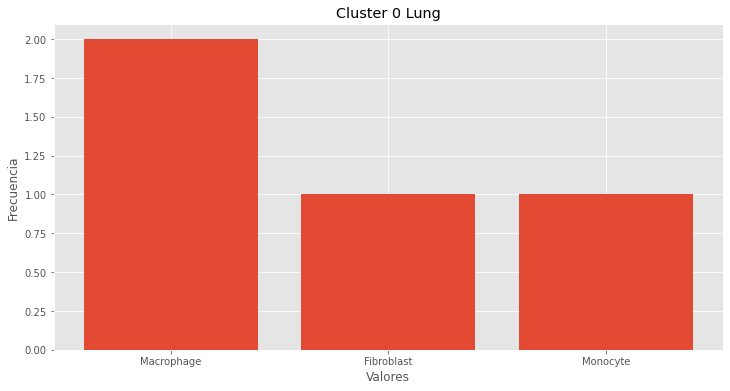

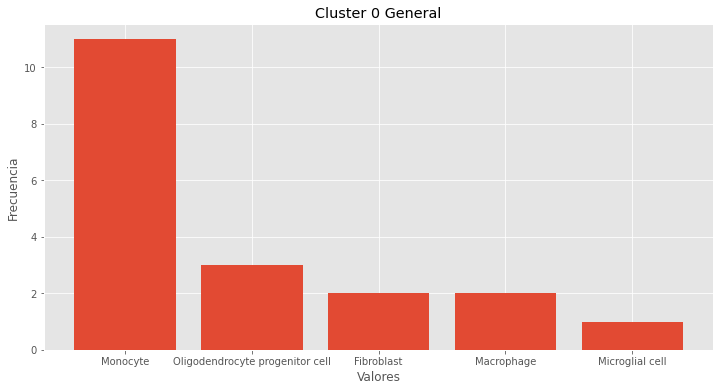

In [130]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 0 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 0 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [126]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='ADH1B') |
                                                                (df['marker']=='TCF21')|
                                                                (df['marker']=='LUM')|
                                                                (df['marker']=='C7')|
                                                                (df['marker']=='MFAP4')|
                                                                (df['marker']=='RARRES2')|
                                                                (df['marker']=='FGFR4')]
df_temp

,species,tissue_type,cell_type,cell_name,marker
137,Human,Adipose tissue,Normal cell,Adipocyte progenitor cell,LUM
7526,Human,Brain,Normal cell,Mesenchymal cell,LUM
8099,Human,Brain,Normal cell,Leptomeningeal cell,LUM
11101,Human,Fetal Leydig,Normal cell,Fetal leydig progenitor cell,TCF21
11965,Human,Airway epithelium,Normal cell,Lonocyte,RARRES2
14544,Human,Epithelium,Normal cell,Mesothelial cell,MFAP4
14703,Human,Epithelium,Normal cell,Myofibroblast,MFAP4
15296,Human,Kidney,Normal cell,Podocyte,TCF21
15653,Human,Fetal kidney,Normal cell,Stromal cell,LUM
16149,Human,Kidney,Normal cell,Fibroblast,LUM


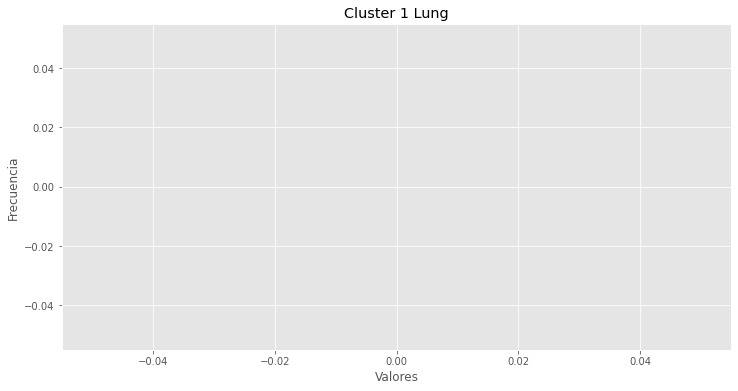

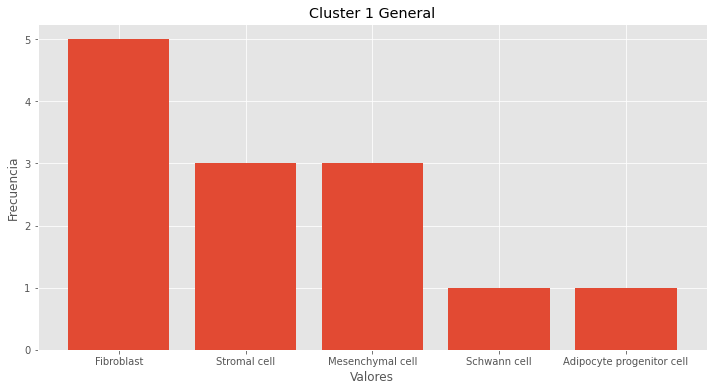

In [127]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 1 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 1 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [124]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='CLDN4') |
                                                                (df['marker']=='KRT19')|
                                                                (df['marker']=='SFTA3')|
                                                                (df['marker']=='NKX2-1')|
                                                                (df['marker']=='EPCAM')|
                                                                (df['marker']=='CPM')|
                                                                (df['marker']=='KRT8')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18327,Human,Lung,Normal cell,Epithelial cell,EPCAM
18344,Human,Lung,Normal cell,Ciliated cell,EPCAM
18367,Human,Lung,Normal cell,Alveolar cell Type 1,EPCAM
18378,Human,Lung,Normal cell,Alveolar cell Type 2,EPCAM
18386,Human,Lung,Normal cell,Epithelial cell,EPCAM
18389,Human,Lung,Normal cell,Epithelial cell,NKX2-1
18641,Human,Lung,Normal cell,Epithelial cell,EPCAM
18642,Human,Lung,Normal cell,Mesenchymal cell,EPCAM
19283,Human,Lung,Normal cell,Epithelial cell,KRT19
19329,Human,Lung,Normal cell,Epithelial cell,EPCAM


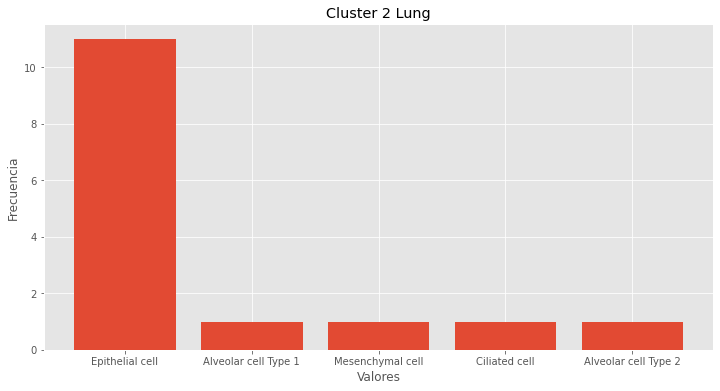

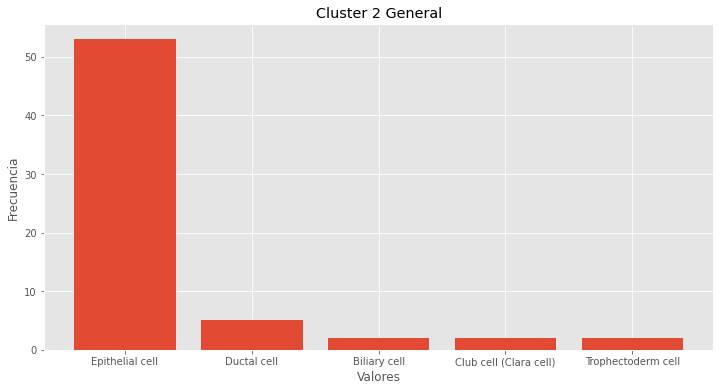

In [125]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 2 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 2 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [23]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='EGFL7') |
                                                                (df['marker']=='RAMP2')|
                                                                (df['marker']=='GNG11')|
                                                                (df['marker']=='PECAM1')|
                                                                (df['marker']=='TM4SF1')|
                                                                (df['marker']=='CLDN5')]#|
                                                                #(df['marker']=='')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18381,Human,Lung,Normal cell,Vascular cell,PECAM1
18630,Human,Lung,Normal cell,Endothelial cell,PECAM1
18640,Human,Lung,Normal cell,Mesenchymal cell,PECAM1
18812,Human,Lung,Normal cell,Endothelial cell,CLDN5
19530,Human,Lung,Normal cell,Endothelial cell,CLDN5
19536,Human,Lung,Normal cell,Pan-endothelial cell,RAMP2
19539,Human,Lung,Normal cell,Endothelial cell,PECAM1


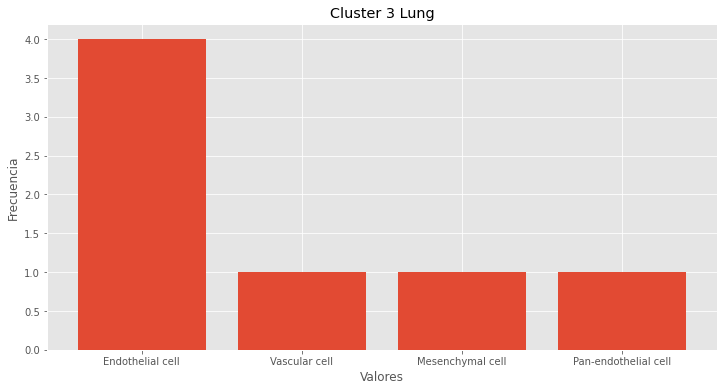

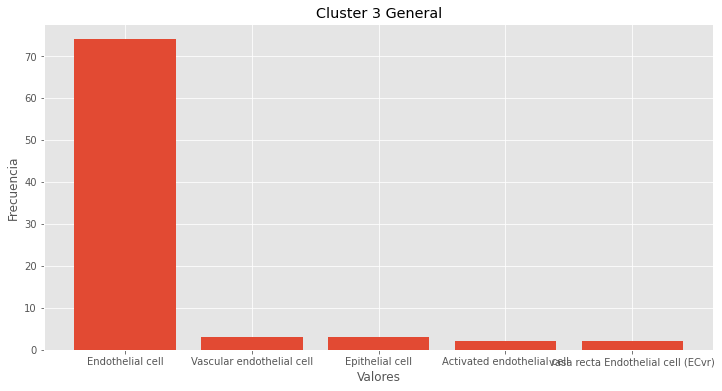

In [26]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 3 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 3 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [30]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='CD79B') |
                                                                (df['marker']=='CD79A')|
                                                                (df['marker']=='CD37')|
                                                                (df['marker']=='IGHM')|
                                                                (df['marker']=='HLA-DRA')|
                                                                (df['marker']=='VPREB3')|
                                                                (df['marker']=='FAM129C')|
                                                                (df['marker']=='CD74')|
                                                                (df['marker']=='TCL1A')]
                                                                #(df['marker']=='')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18195,Human,Lung,Normal cell,Plasmacytoid dendritic cell(pDC),TCL1A
18349,Human,Lung,Normal cell,B cell,CD79A
18548,Human,Lung,Normal cell,B cell,CD79A
18834,Human,Lung,Normal cell,B cell,CD79A
19280,Human,Lung,Normal cell,B cell,CD79B
19286,Human,Lung,Normal cell,B cell,CD79A
19630,Human,Lung,Normal cell,B cell,IGHM
19657,Human,Lung,Normal cell,Macrophage,CD74
19670,Human,Lung,Normal cell,Dendritic cell,HLA-DRA
19673,Human,Lung,Normal cell,Dendritic cell,CD74


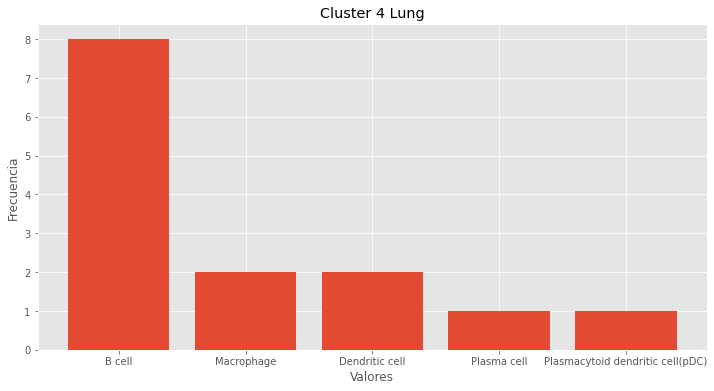

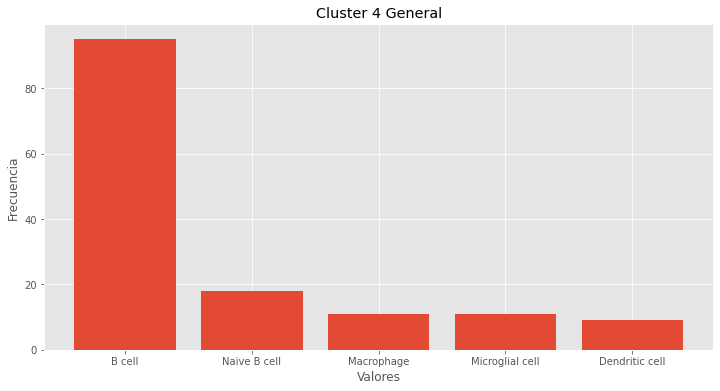

In [31]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 4 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 4 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [43]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='C1QC')|
                                                                (df['marker']=='C1QA')|
                                                                (df['marker']=='C1QB')|
                                                                (df['marker']=='AIF1')|
                                                                (df['marker']=='TYROBP')|
                                                                (df['marker']=='FOLR2')|
                                                                (df['marker']=='RNASE1')]
df_temp

,species,tissue_type,cell_type,cell_name,marker
156,Human,Adipose tissue,Normal cell,M2 macrophage,FOLR2
1152,Human,Peripheral blood,Normal cell,Natural killer T(NKT) cell,TYROBP
2070,Human,Peripheral blood,Normal cell,Monocyte,TYROBP
2320,Human,Peripheral blood,Normal cell,Natural killer cell,TYROBP
3474,Human,Blood vessel,Normal cell,Microglial cell,AIF1
...,...,...,...,...,...
25182,Human,Testis,Normal cell,Macrophage,C1QC
25183,Human,Testis,Normal cell,Macrophage,C1QA
25205,Human,Testis,Normal cell,Macrophage,C1QB
25968,Human,Undefined,Normal cell,Macrophage,C1QB


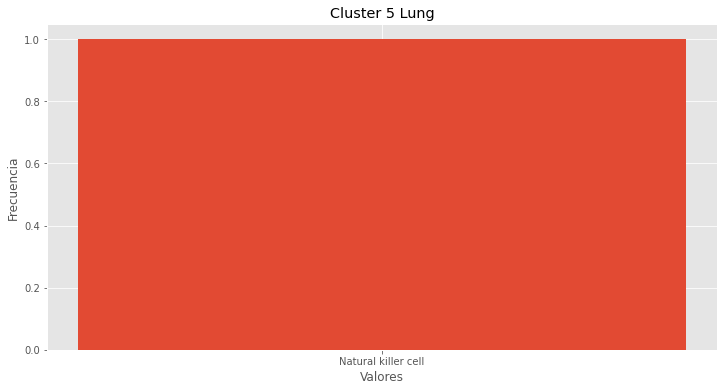

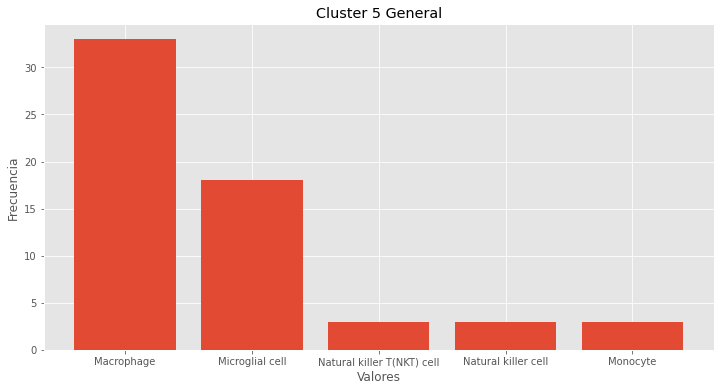

In [39]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 5 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 5 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [151]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='LST1')|
                                                                (df['marker']=='TYROBP')|
                                                                (df['marker']=='AIF1')|
                                                                (df['marker']=='SPI1')|
                                                                (df['marker']=='FCER1G')|
                                                                (df['marker']=='SRGN')|
                                                                (df['marker']=='MNDA')]
                                                                #(df['marker']=='')]
df_temp

,species,tissue_type,cell_type,cell_name,marker
742,Human,Blood,Normal cell,Activated memory B cell,FCER1G
816,Human,Blood,Normal cell,Myeloid cell,LST1
825,Human,Blood,Normal cell,Myeloid cell,MNDA
1152,Human,Peripheral blood,Normal cell,Natural killer T(NKT) cell,TYROBP
2070,Human,Peripheral blood,Normal cell,Monocyte,TYROBP
2305,Human,Blood,Normal cell,Red blood cell (erythrocyte),SPI1
2320,Human,Peripheral blood,Normal cell,Natural killer cell,TYROBP
2372,Human,Peripheral blood,Normal cell,Monocyte,MNDA
2547,Human,Peripheral blood,Normal cell,Natural killer cell,FCER1G
3474,Human,Blood vessel,Normal cell,Microglial cell,AIF1


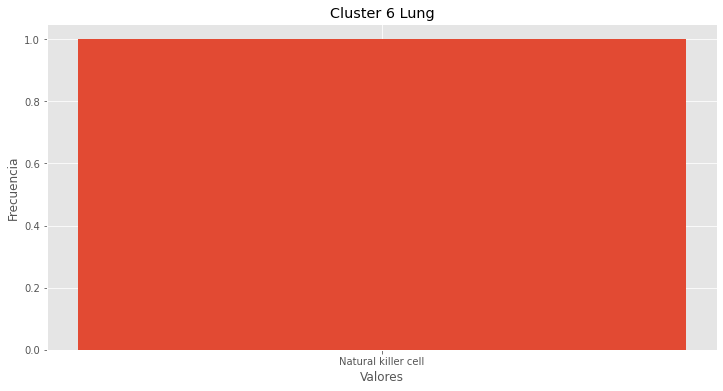

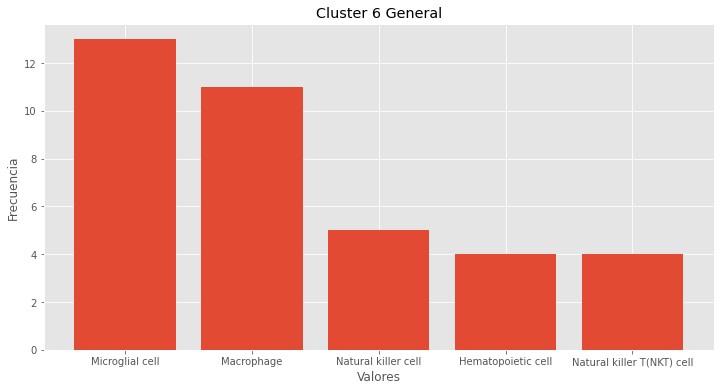

In [152]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 6 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 6 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [153]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='UBE2C')|
                                                                (df['marker']=='TOP2A')|
                                                                (df['marker']=='CENPF')|
                                                                (df['marker']=='NUSAP1')|
                                                                (df['marker']=='MAD2L1')|
                                                                (df['marker']=='CDK1')|
                                                                (df['marker']=='MKI67')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']
df_temp

,species,tissue_type,cell_type,cell_name,marker
1122,Human,Blood,Normal cell,Cycling cell,MKI67
1127,Human,Blood,Normal cell,Cycling cell,TOP2A
1142,Human,Peripheral blood,Normal cell,Proliferative T cell,MKI67
1158,Human,Peripheral blood,Normal cell,Dividing plasma B cell,MKI67
1466,Human,Peripheral blood,Normal cell,Proliferative lymphocyte,MKI67
...,...,...,...,...,...
25641,Human,Tonsil,Normal cell,Germinal center B cell,MKI67
26297,Human,Undefined,Normal cell,Dividing cardiomyocyte,CENPF
26824,Human,Urine,Normal cell,Fibroblast,UBE2C
26827,Human,Urine,Normal cell,Fibroblast,TOP2A


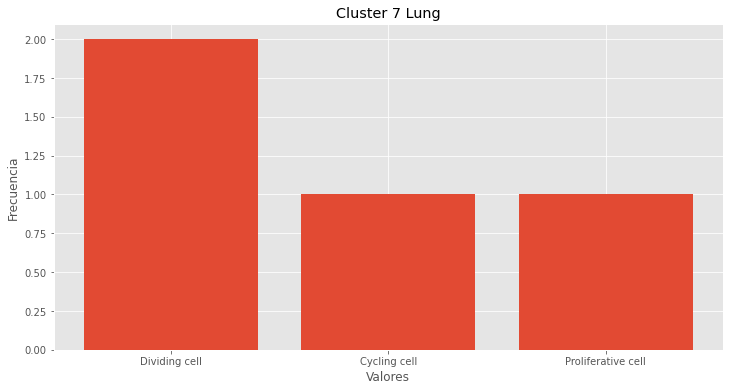

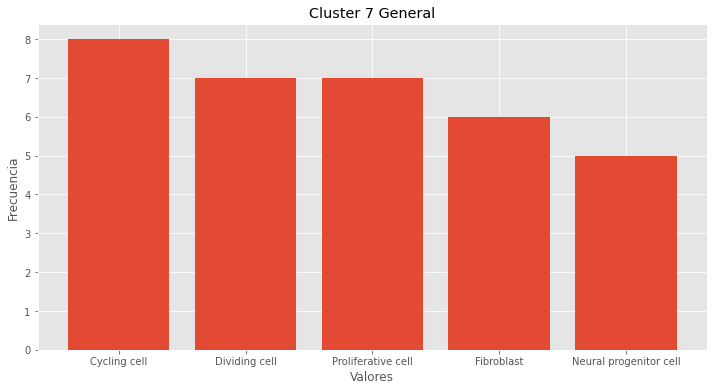

In [48]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 7 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 7 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [51]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='ACTG2')|
                                                                (df['marker']=='HHIP')|
                                                                (df['marker']=='MYH11')|
                                                                (df['marker']=='ACTA2')|
                                                                (df['marker']=='TAGLN')|
                                                                (df['marker']=='IGF1')|
                                                                (df['marker']=='MYLK')|
                                                                (df['marker']=='DES')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18374,Human,Lung,Normal cell,Muscularis cell,TAGLN
18375,Human,Lung,Normal cell,Muscularis cell,ACTA2
18459,Human,Lung,Normal cell,Smooth muscle cell,ACTA2
18463,Human,Lung,Normal cell,Smooth muscle cell,MYH11
18655,Human,Lung,Normal cell,Smooth muscle cell,DES
18656,Human,Lung,Normal cell,Smooth muscle cell,ACTG2
18658,Human,Lung,Normal cell,Myofibroblast,MYLK
19542,Human,Lung,Normal cell,Myofibroblast,ACTA2
19545,Human,Lung,Normal cell,Fibroblast,ACTA2
20019,Human,Lung,Normal cell,Stromal cell,ACTA2


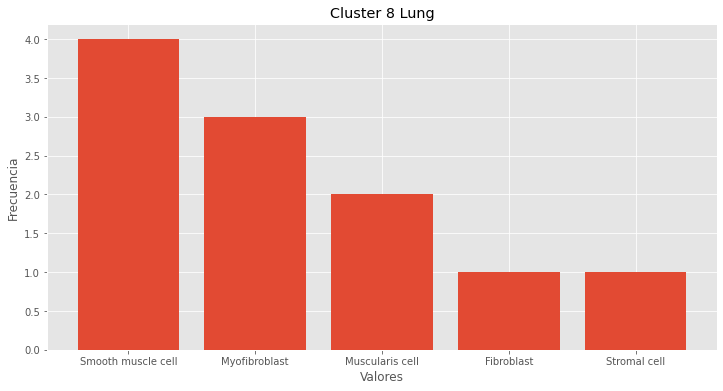

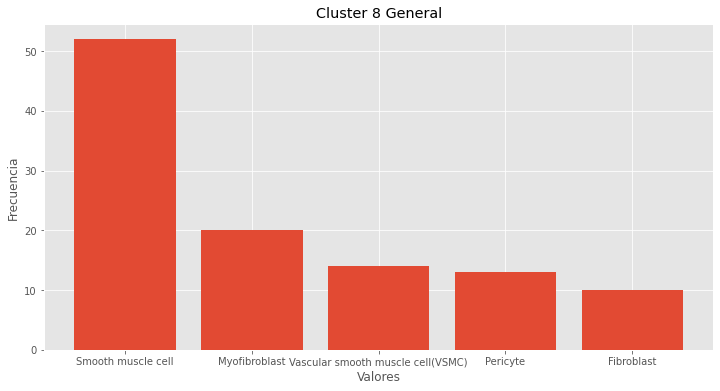

In [53]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 8 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 8 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [62]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='COL3A1')|
                                                                (df['marker']=='COL1A1')|
                                                                (df['marker']=='OGN')|
                                                                (df['marker']=='FBLN1')|
                                                                (df['marker']=='COL1A2')|
                                                                (df['marker']=='PLAC9')|
                                                                (df['marker']=='SERPINF1')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18830,Human,Lung,Normal cell,Fibroblast,COL1A1
19181,Human,Lung,Normal cell,Stromal cell,COL1A1
19540,Human,Lung,Normal cell,Fibroblast,COL1A1
19541,Human,Lung,Normal cell,Myofibroblast,COL1A1
19546,Human,Lung,Normal cell,Myofibroblast,COL3A1
19547,Human,Lung,Normal cell,Fibroblast,COL3A1
20004,Human,Lung,Normal cell,Stromal cell,COL1A2
20014,Human,Lung,Normal cell,Stromal cell,COL3A1


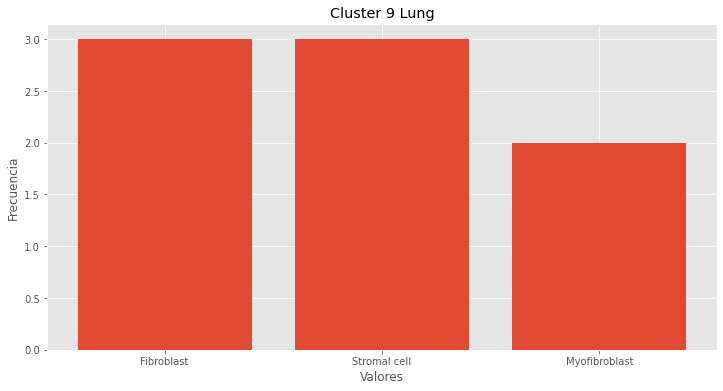

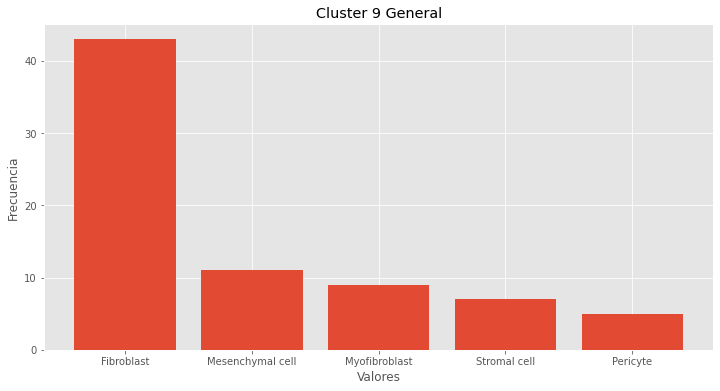

In [64]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 9 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 9 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [65]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='NKG7')|
                                                                (df['marker']=='CTSW')|
                                                                (df['marker']=='CST7')|
                                                                (df['marker']=='KLRB1')|
                                                                (df['marker']=='GZMA')|
                                                                (df['marker']=='CD7')|
                                                                (df['marker']=='IFITM1')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18424,Human,Lung,Normal cell,Lymphocyte,NKG7
18477,Human,Lung,Normal cell,CD8+ T cell,GZMA
18545,Human,Lung,Normal cell,Natural killer cell,NKG7
18832,Human,Lung,Normal cell,Natural killer cell,NKG7
19295,Human,Lung,Normal cell,Natural killer cell,NKG7
19669,Human,Lung,Normal cell,Regulatory T(Treg) cell,KLRB1
19726,Human,Lung,Normal cell,Natural killer cell,NKG7
19733,Human,Lung,Normal cell,Natural killer cell,KLRB1
19932,Human,Lung,Normal cell,Natural killer cell,KLRB1
19975,Human,Lung,Normal cell,Natural killer cell,NKG7


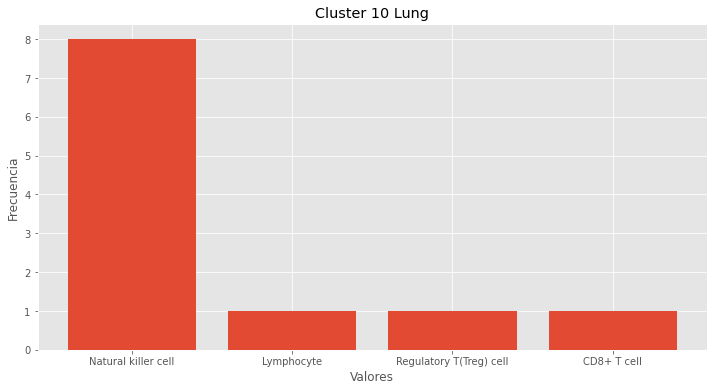

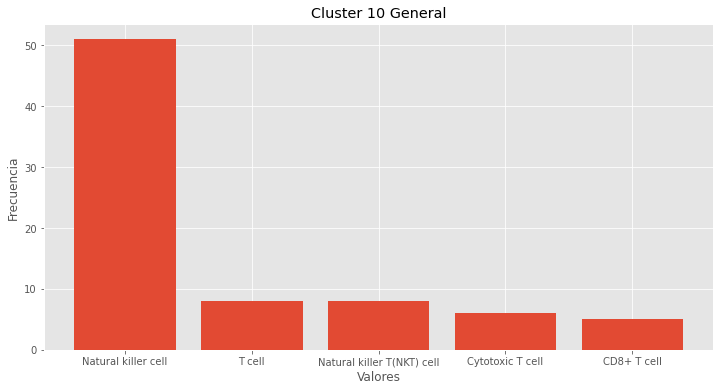

In [67]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 10 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 10 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [160]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='BGN')|
                                                                (df['marker']=='COX4I2')|
                                                                (df['marker']=='EGFL6')|
                                                                (df['marker']=='HEYL')|
                                                                (df['marker']=='HIGD1B')]#|
                                                                #(df['marker']=='')|
                                                                #(df['marker']=='')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']
df_temp

,species,tissue_type,cell_type,cell_name,marker
5376,Human,Brain,Normal cell,Neural crest stem cell,BGN
16513,Human,Kidney,Normal cell,Venule endothelial cell,BGN
16693,Human,Kidney,Normal cell,Vein endothelial cell,BGN
18661,Human,Lung,Normal cell,Pericyte,COX4I2
21114,Human,Ovary,Normal cell,Fibroblast,BGN


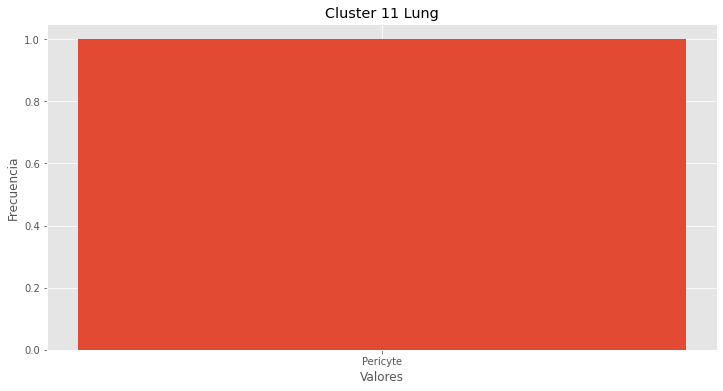

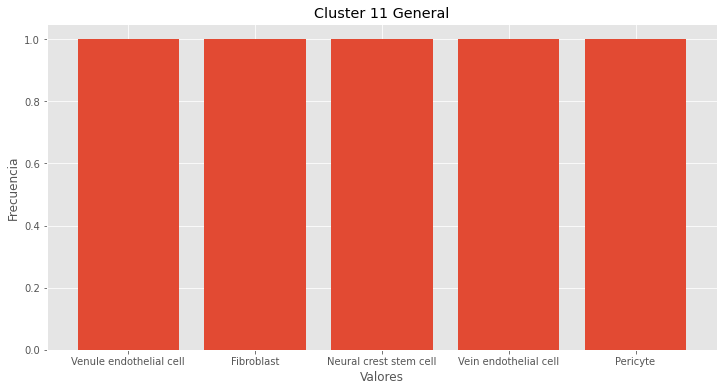

In [71]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 11 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 11 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [72]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='LTB')|
                                                                (df['marker']=='CD3E')|
                                                                (df['marker']=='CD52')|
                                                                (df['marker']=='CD3D')|
                                                                (df['marker']=='IL32')|
                                                                (df['marker']=='LCK')]#|
                                                                #(df['marker']=='')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18336,Human,Lung,Normal cell,CD8+ T cell,CD3E
18380,Human,Lung,Normal cell,CD4+ T cell,CD3E
18552,Human,Lung,Normal cell,T cell,CD3D
18837,Human,Lung,Normal cell,T cell,CD3D
19284,Human,Lung,Normal cell,CD4 T cell,CD3D
19288,Human,Lung,Normal cell,T cell,CD3D
19289,Human,Lung,Normal cell,CD8 T cell,CD3D
19292,Human,Lung,Normal cell,CD4 T cell,CD3E
19302,Human,Lung,Normal cell,CD8 T cell,CD3E
19379,Human,Lung,Normal cell,T cell,CD3D


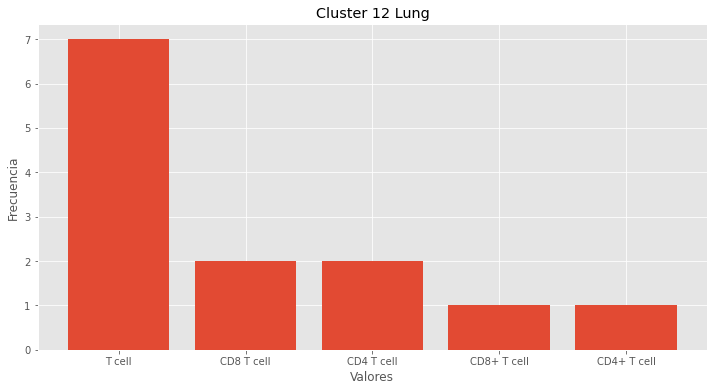

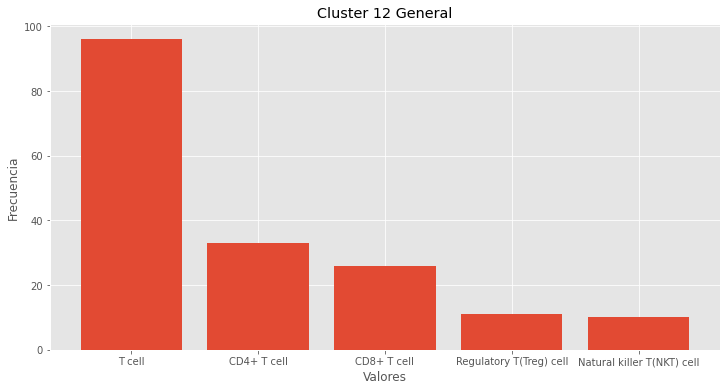

In [73]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 12 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 12 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [77]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='EEF1A1')|
                                                                (df['marker']=='RPS8')|
                                                                (df['marker']=='RPL10')|
                                                                (df['marker']=='RPLP1')|
                                                                (df['marker']=='RPL11')|
                                                                (df['marker']=='RPL41')|
                                                                (df['marker']=='RPL32')|
                                                                (df['marker']=='RPL13')|
                                                                (df['marker']=='TMSB10')|
                                                                (df['marker']=='RPS12')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker


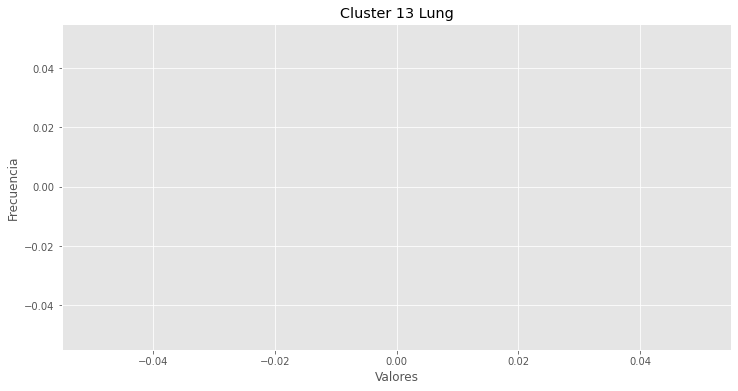

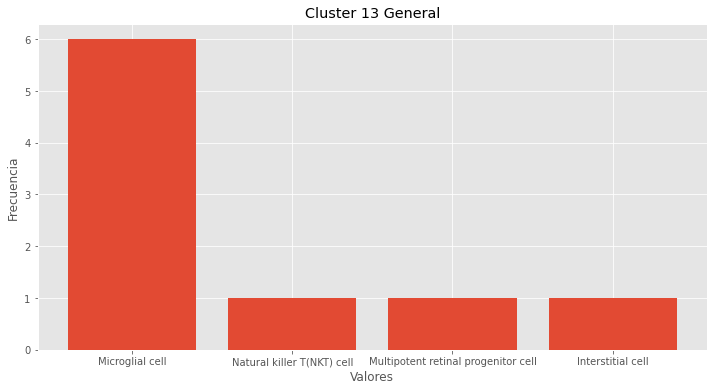

In [78]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 13 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 13 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [79]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='SFTPB')|
                                                                (df['marker']=='SFTA3')|
                                                                (df['marker']=='NKX2-1')|
                                                                (df['marker']=='KRT19')|
                                                                (df['marker']=='S100A14')|
                                                                (df['marker']=='CLDN4')|
                                                                (df['marker']=='KRT8')|
                                                                (df['marker']=='EPCAM')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18327,Human,Lung,Normal cell,Epithelial cell,EPCAM
18344,Human,Lung,Normal cell,Ciliated cell,EPCAM
18367,Human,Lung,Normal cell,Alveolar cell Type 1,EPCAM
18378,Human,Lung,Normal cell,Alveolar cell Type 2,EPCAM
18386,Human,Lung,Normal cell,Epithelial cell,EPCAM
18388,Human,Lung,Normal cell,Epithelial cell,SFTPB
18389,Human,Lung,Normal cell,Epithelial cell,NKX2-1
18412,Human,Lung,Normal cell,Secretory cell,SFTPB
18641,Human,Lung,Normal cell,Epithelial cell,EPCAM
18642,Human,Lung,Normal cell,Mesenchymal cell,EPCAM


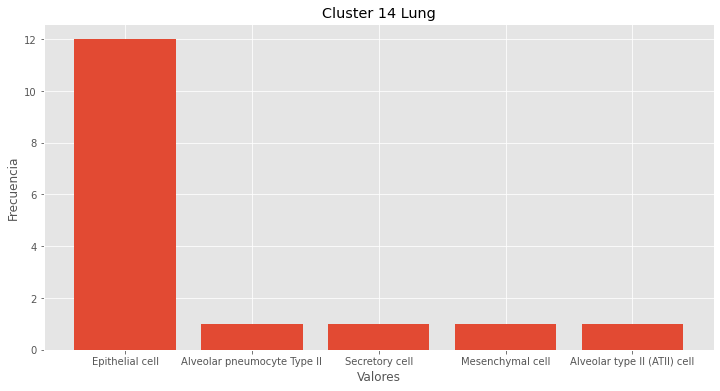

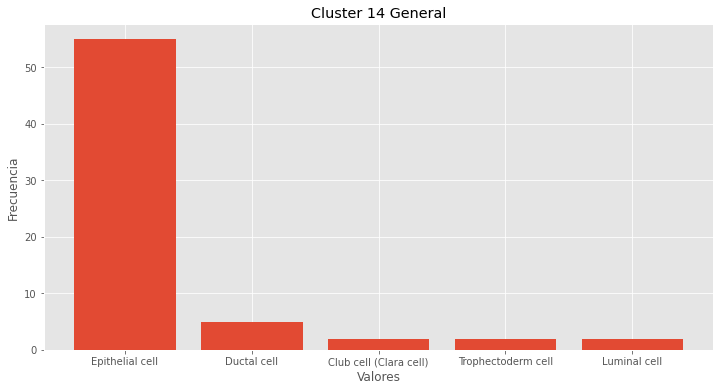

In [80]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 14 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 14 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [101]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='CCL21')|
                                                                (df['marker']=='TFF3')|
                                                                (df['marker']=='PROX1')|
                                                                (df['marker']=='CLDN5')|
                                                                (df['marker']=='FLT4')|
                                                                (df['marker']=='CAVIN2')|
                                                                (df['marker']=='TIE1')|
                                                                (df['marker']=='MMRN1')|
                                                                (df['marker']=='GNG11')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18377,Human,Lung,Normal cell,Vascular cell,CCL21
18812,Human,Lung,Normal cell,Endothelial cell,CLDN5
19446,Human,Lung,Normal cell,Lymphocyte,PROX1
19486,Human,Lung,Normal cell,Pan-endothelial cell,CAVIN2
19496,Human,Lung,Normal cell,Pan-endothelial cell,TIE1
19516,Human,Lung,Normal cell,Lymphocyte,FLT4
19530,Human,Lung,Normal cell,Endothelial cell,CLDN5


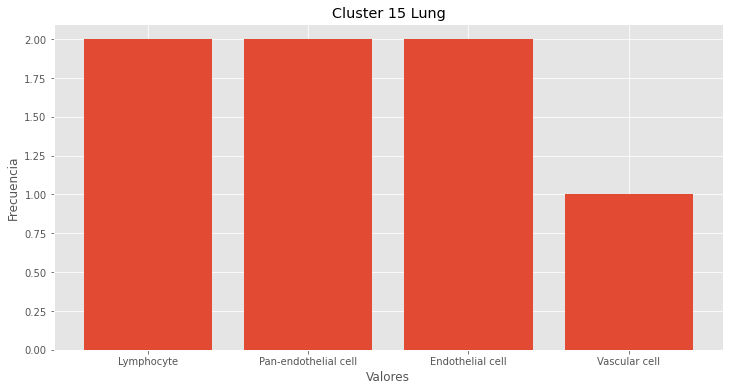

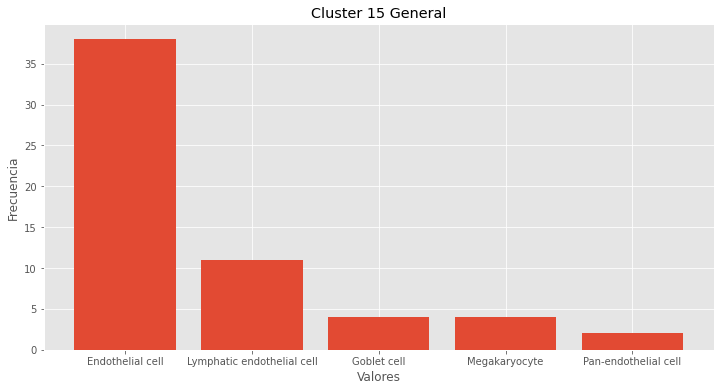

In [103]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 15 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 15 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [104]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='TAGLN')|
                                                                (df['marker']=='MYH11')|
                                                                (df['marker']=='LMCD1')|
                                                                (df['marker']=='ACTA2')|
                                                                (df['marker']=='ACTG2')|
                                                                (df['marker']=='SEMA3C')|
                                                                (df['marker']=='CXCL14')|
                                                                (df['marker']=='TPM2')|
                                                                (df['marker']=='MYLK')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18374,Human,Lung,Normal cell,Muscularis cell,TAGLN
18375,Human,Lung,Normal cell,Muscularis cell,ACTA2
18459,Human,Lung,Normal cell,Smooth muscle cell,ACTA2
18463,Human,Lung,Normal cell,Smooth muscle cell,MYH11
18656,Human,Lung,Normal cell,Smooth muscle cell,ACTG2
18658,Human,Lung,Normal cell,Myofibroblast,MYLK
19542,Human,Lung,Normal cell,Myofibroblast,ACTA2
19545,Human,Lung,Normal cell,Fibroblast,ACTA2
20019,Human,Lung,Normal cell,Stromal cell,ACTA2


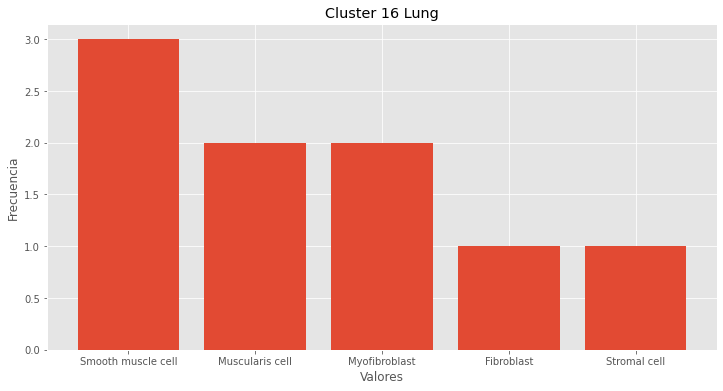

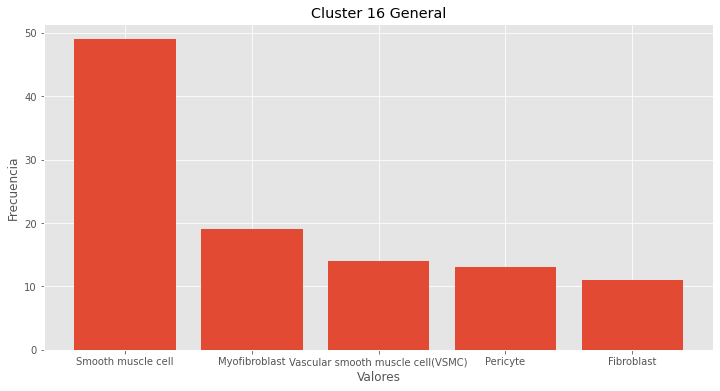

In [105]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 16 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 16 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [106]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='IGLL1')|
                                                                (df['marker']=='ARHGDIB')|
                                                                (df['marker']=='CCND3')|
                                                                (df['marker']=='VPREB1')|
                                                                (df['marker']=='HMGA1')|
                                                                (df['marker']=='VPREB3')|
                                                                (df['marker']=='IGHM')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18417,Human,Lung,Normal cell,Bud tip progenitor cell,HMGA1
19630,Human,Lung,Normal cell,B cell,IGHM
19762,Human,Lung,Normal cell,B cell,IGHM
19965,Human,Lung,Normal cell,Plasma cell,IGHM


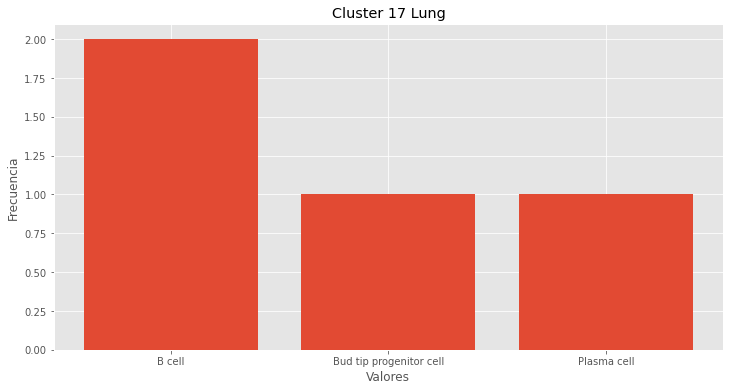

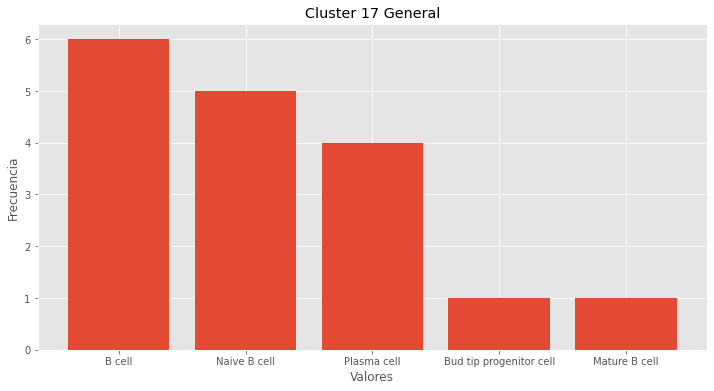

In [107]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 17 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 17 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [108]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='EPCAM')|
                                                                (df['marker']=='KRT19')|
                                                                (df['marker']=='IGFBP22')|
                                                                (df['marker']=='KRT8')|
                                                                (df['marker']=='CLDN6')|
                                                                (df['marker']=='KRT18')]#|
                                                                #(df['marker']=='CD24')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18327,Human,Lung,Normal cell,Epithelial cell,EPCAM
18344,Human,Lung,Normal cell,Ciliated cell,EPCAM
18367,Human,Lung,Normal cell,Alveolar cell Type 1,EPCAM
18378,Human,Lung,Normal cell,Alveolar cell Type 2,EPCAM
18386,Human,Lung,Normal cell,Epithelial cell,EPCAM
18641,Human,Lung,Normal cell,Epithelial cell,EPCAM
18642,Human,Lung,Normal cell,Mesenchymal cell,EPCAM
19283,Human,Lung,Normal cell,Epithelial cell,KRT19
19312,Human,Lung,Normal cell,Epithelial cell,KRT18
19329,Human,Lung,Normal cell,Epithelial cell,EPCAM


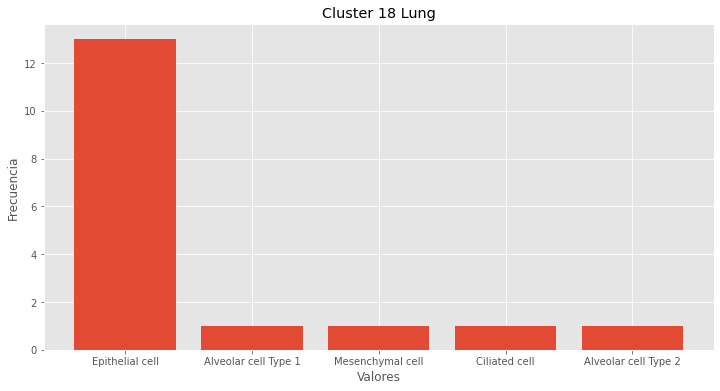

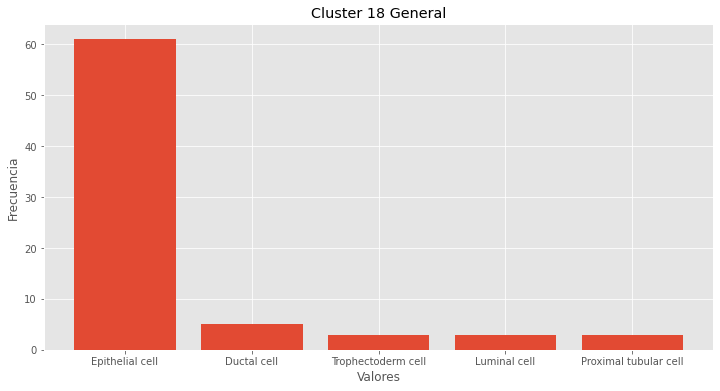

In [110]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 18 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 18 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [112]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='COL1A1')|
                                                                (df['marker']=='KCNQ1OT1')|
                                                                (df['marker']=='MALAT1')|
                                                                (df['marker']=='MEG3')|
                                                                (df['marker']=='COL3A1')|
                                                                (df['marker']=='FN1')]#|
                                                                #(df['marker']=='')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18594,Human,Lung,Normal cell,Macrophage,FN1
18602,Human,Lung,Normal cell,Monocyte,FN1
18830,Human,Lung,Normal cell,Fibroblast,COL1A1
19147,Human,Lung,Normal cell,OxPhos monocyte,MALAT1
19181,Human,Lung,Normal cell,Stromal cell,COL1A1
19540,Human,Lung,Normal cell,Fibroblast,COL1A1
19541,Human,Lung,Normal cell,Myofibroblast,COL1A1
19546,Human,Lung,Normal cell,Myofibroblast,COL3A1
19547,Human,Lung,Normal cell,Fibroblast,COL3A1
19938,Human,Lung,Normal cell,Macrophage,FN1


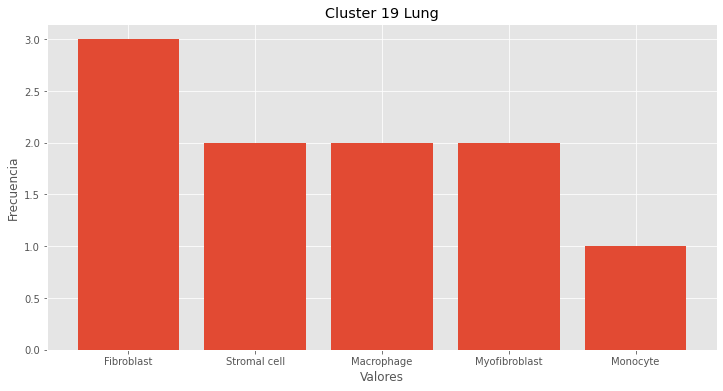

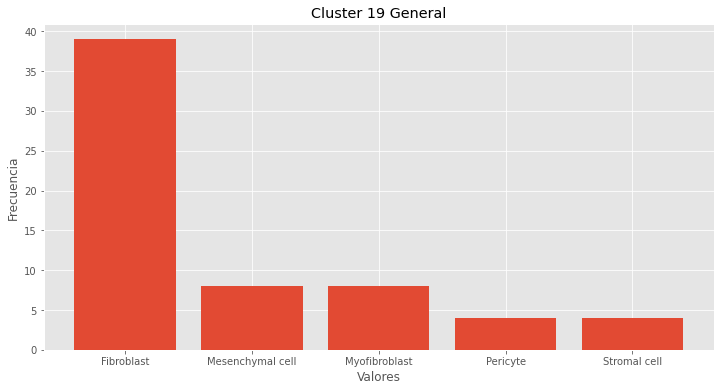

In [113]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 19 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 19 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [81]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='CAPS')|
                                                                (df['marker']=='RSPH1')|
                                                                (df['marker']=='S20ORF85')|
                                                                (df['marker']=='FAM183A')|
                                                                (df['marker']=='C9ORF24')|
                                                                (df['marker']=='ZMYND10')|
                                                                (df['marker']=='PIFO')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18351,Human,Lung,Normal cell,Ciliated cell,PIFO


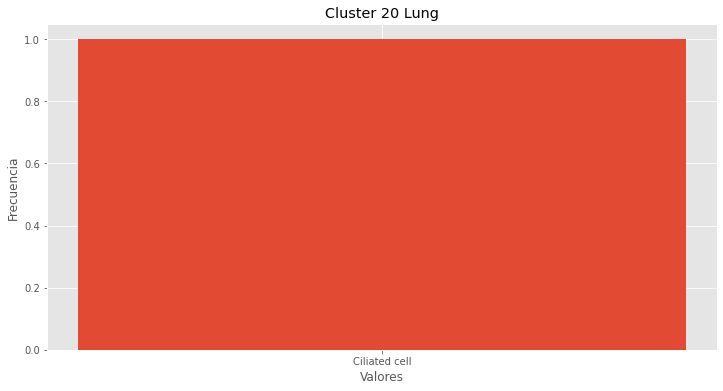

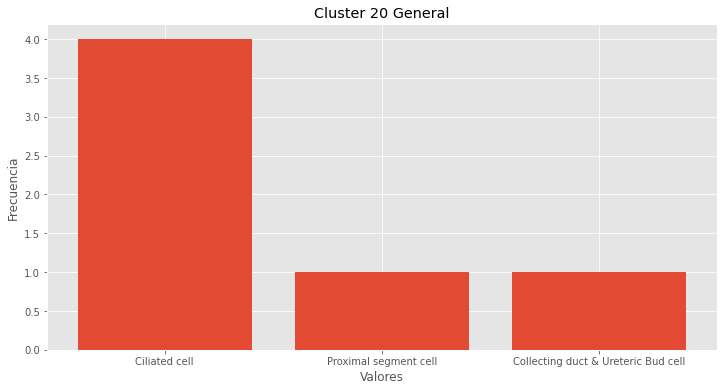

In [84]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 20 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 20 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [159]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='ADH1B')|
                                                                (df['marker']=='TCF21')|
                                                                (df['marker']=='C7')|
                                                                (df['marker']=='LUM')|
                                                                (df['marker']=='COL6A3')|
                                                                (df['marker']=='OLFML3')|
                                                                (df['marker']=='COL6A1')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']
df_temp

,species,tissue_type,cell_type,cell_name,marker
137,Human,Adipose tissue,Normal cell,Adipocyte progenitor cell,LUM
5981,Human,Brain,Normal cell,Microglial cell,OLFML3
6360,Human,Brain,Normal cell,Microglial cell,OLFML3
7526,Human,Brain,Normal cell,Mesenchymal cell,LUM
8099,Human,Brain,Normal cell,Leptomeningeal cell,LUM
11101,Human,Fetal Leydig,Normal cell,Fetal leydig progenitor cell,TCF21
15296,Human,Kidney,Normal cell,Podocyte,TCF21
15653,Human,Fetal kidney,Normal cell,Stromal cell,LUM
16149,Human,Kidney,Normal cell,Fibroblast,LUM
17554,Human,Liver,Normal cell,Cancer-associated fibroblast,LUM


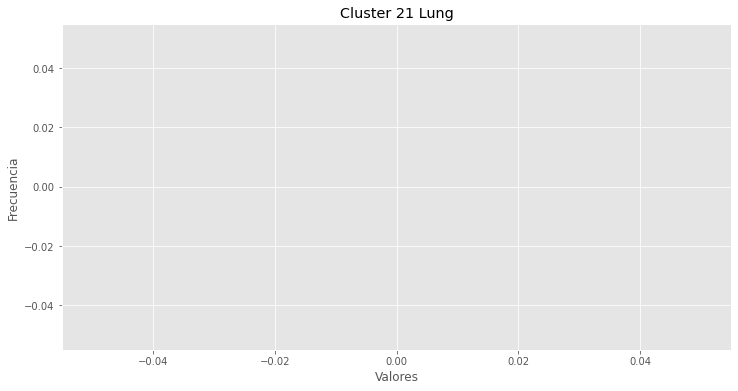

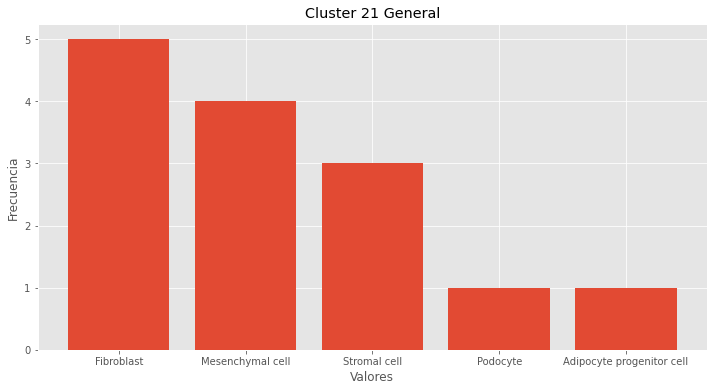

In [88]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 21 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 21 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [89]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='EGFL6')|
                                                                (df['marker']=='COX4I2')|
                                                                (df['marker']=='BGN')|
                                                                (df['marker']=='HEYL')|
                                                                (df['marker']=='IGFBP7')|
                                                                (df['marker']=='HES4')|
                                                                (df['marker']=='MCAM')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18289,Human,Lung,Normal cell,Mesenchymal stromal cell,MCAM
18460,Human,Lung,Normal cell,Pericyte,MCAM
18661,Human,Lung,Normal cell,Pericyte,COX4I2


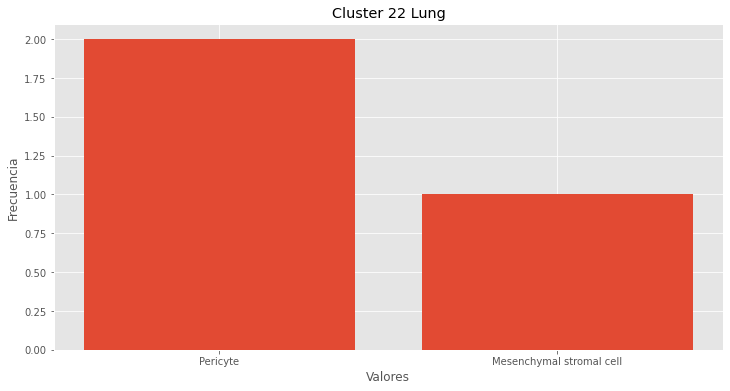

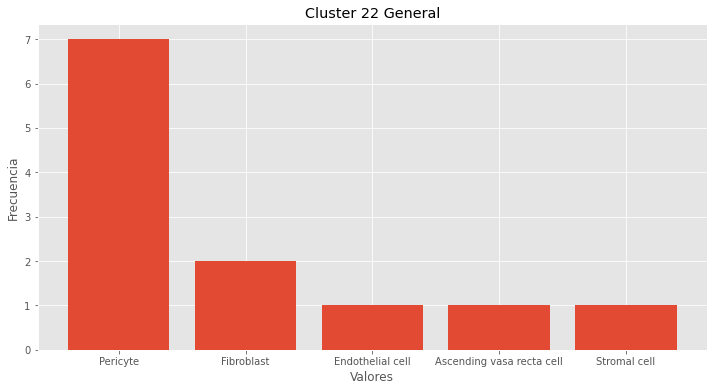

In [90]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 22 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 22 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [91]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='CRABP1')|
                                                                (df['marker']=='TUBB2B')|
                                                                (df['marker']=='NNAT')|
                                                                (df['marker']=='DLX2')|
                                                                (df['marker']=='PCBP4')|
                                                                (df['marker']=='DLX1')|
                                                                (df['marker']=='UCHL1')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker


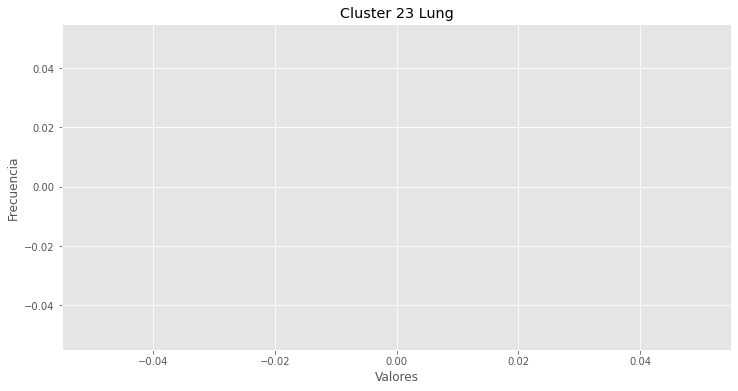

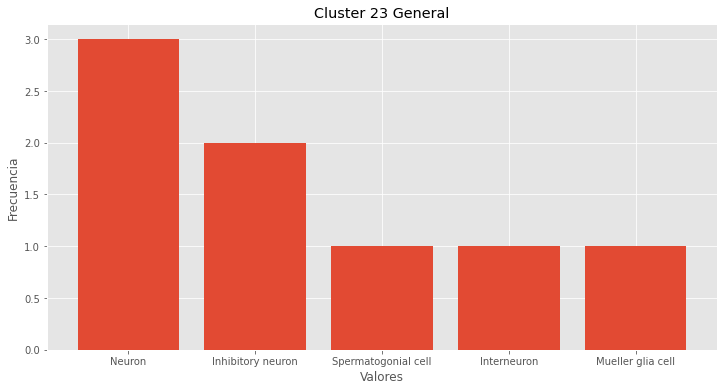

In [92]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 23 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 23 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [93]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='ACTG2')|
                                                                (df['marker']=='MYH11')|
                                                                (df['marker']=='TAGLN')|
                                                                (df['marker']=='ACTA2')|
                                                                (df['marker']=='HHIP')|
                                                                (df['marker']=='MYOCD')|
                                                                (df['marker']=='DES')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18374,Human,Lung,Normal cell,Muscularis cell,TAGLN
18375,Human,Lung,Normal cell,Muscularis cell,ACTA2
18459,Human,Lung,Normal cell,Smooth muscle cell,ACTA2
18463,Human,Lung,Normal cell,Smooth muscle cell,MYH11
18655,Human,Lung,Normal cell,Smooth muscle cell,DES
18656,Human,Lung,Normal cell,Smooth muscle cell,ACTG2
19542,Human,Lung,Normal cell,Myofibroblast,ACTA2
19545,Human,Lung,Normal cell,Fibroblast,ACTA2
20019,Human,Lung,Normal cell,Stromal cell,ACTA2
20087,Human,Lung,Normal cell,Myofibroblast,HHIP


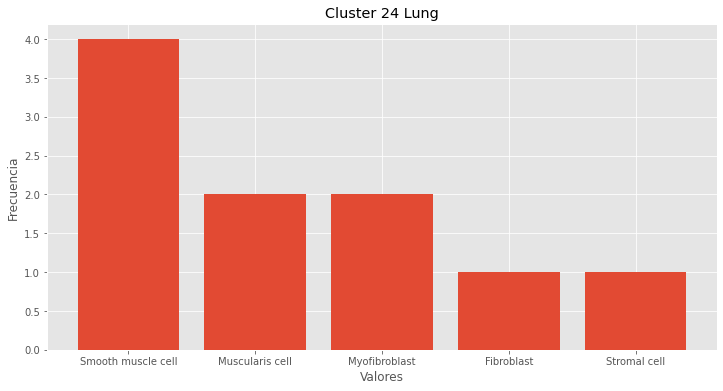

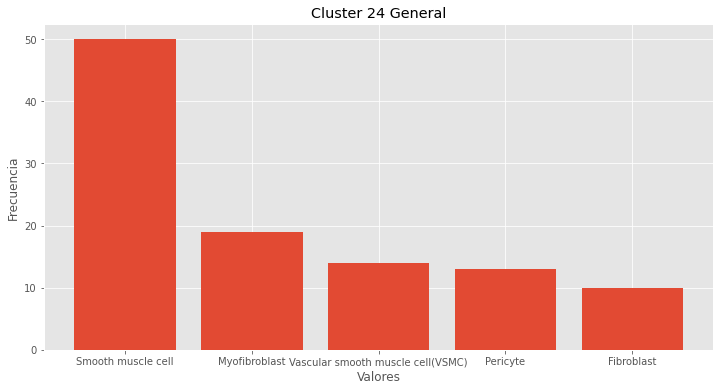

In [94]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 24 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 24 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [158]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='SBSPON')|
                                                                (df['marker']=='ALDH1A2')|
                                                                (df['marker']=='UPK3B')|
                                                                (df['marker']=='TNNT1')|
                                                                (df['marker']=='KRT8')|
                                                                (df['marker']=='KRT19')|
                                                                (df['marker']=='KRT18')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']
df_temp

,species,tissue_type,cell_type,cell_name,marker
88,Human,Adipose tissue,Normal cell,Epithelial cell,KRT8
89,Human,Adipose tissue,Normal cell,Epithelial cell,KRT18
122,Human,Adipose tissue,Normal cell,Mesothelial cell,KRT19
126,Human,Adipose tissue,Normal cell,Mesothelial cell,UPK3B
435,Human,Bladder,Normal cell,Epithelial cell,KRT18
...,...,...,...,...,...
25501,Human,Thymus,Normal cell,Thymic epithelial cell (TEC),KRT8
25527,Human,Thymus,Normal cell,Intrathymic fibroblast(Fb1),ALDH1A2
25699,Human,Epithelium,Normal cell,Epithelial cell,KRT8
26832,Human,Urine,Normal cell,Bladder epithelial cell,KRT19


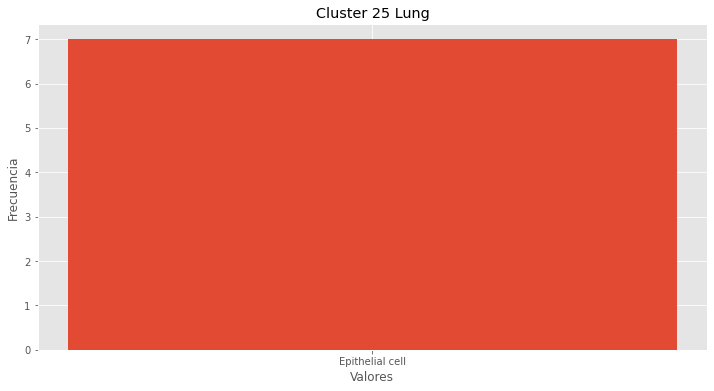

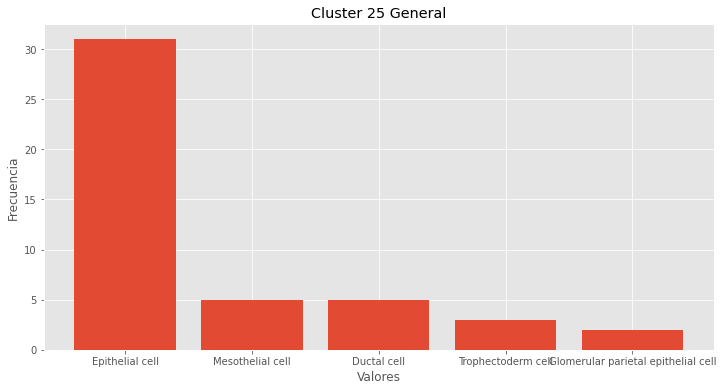

In [96]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 25 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 25 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [114]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='CLEC9A')|
                                                                (df['marker']=='IRF8')|
                                                                (df['marker']=='HLA-DQA1')|
                                                                (df['marker']=='CPVL')|
                                                                (df['marker']=='S100B')|
                                                                (df['marker']=='HLA-DQ')|
                                                                (df['marker']=='HLA-DPA1')|
                                                                (df['marker']=='HLA-DPB1')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18200,Human,Lung,Normal cell,Conventional dendritic cell(cDC),CLEC9A
18201,Human,Lung,Normal cell,Plasmacytoid dendritic cell(pDC),IRF8
18353,Human,Lung,Normal cell,Conventional dendritic cell 1(cDC1),CLEC9A


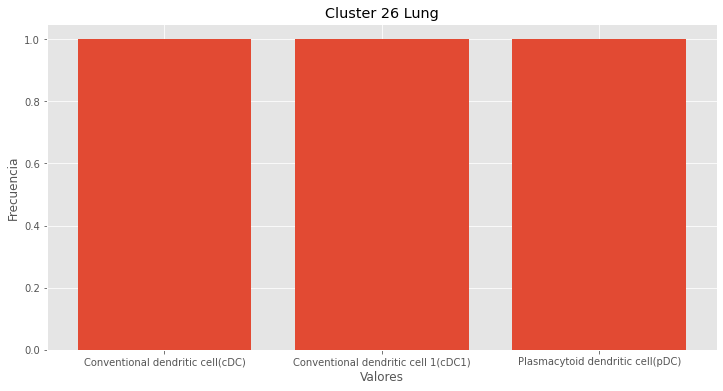

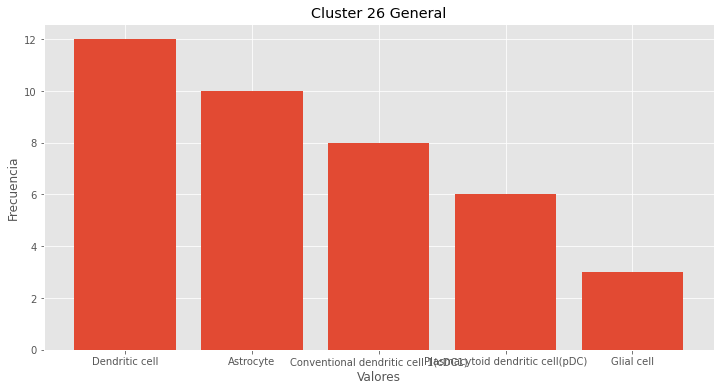

In [116]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 26 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 26 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [117]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='KRT15')|
                                                                (df['marker']=='PERP')|
                                                                (df['marker']=='KRT19')|
                                                                (df['marker']=='IGFBP2')|
                                                                (df['marker']=='KRT5')|
                                                                (df['marker']=='KRT17')|
                                                                (df['marker']=='TACSTD2')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18329,Human,Lung,Normal cell,Basal cell,KRT5
18407,Human,Lung,Normal cell,Basal-like cell,KRT5
19283,Human,Lung,Normal cell,Epithelial cell,KRT19
19311,Human,Lung,Normal cell,Basal cell,KRT5
19331,Human,Lung,Normal cell,Basal epithelial cell,KRT5
19333,Human,Lung,Normal cell,Basal epithelial cell,KRT17
19756,Human,Lung,Normal cell,Epithelial cell,KRT19
20013,Human,Lung,Normal cell,Epithelial cell,KRT5


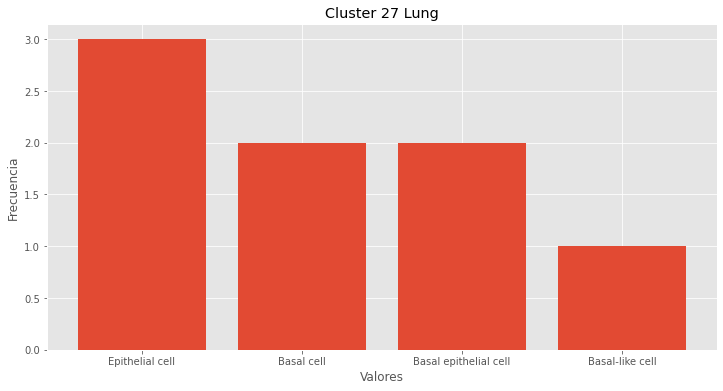

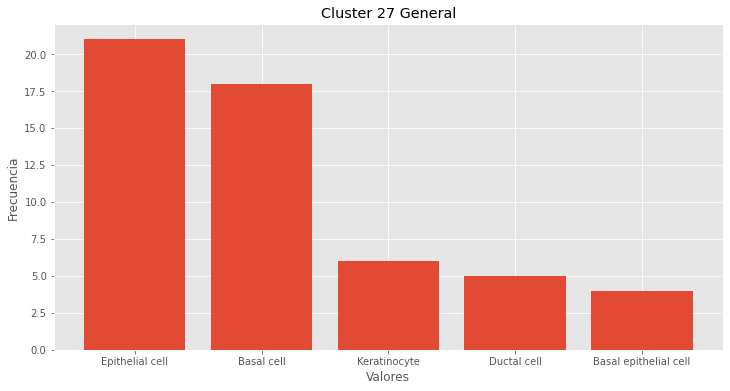

In [118]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 27 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 27 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [119]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='HBA1')|
                                                                (df['marker']=='HBA2')|
                                                                (df['marker']=='HBG1')|
                                                                (df['marker']=='HBM')|
                                                                (df['marker']=='SLC25A37')]#|
                                                                #(df['marker']=='')|
                                                                #(df['marker']=='')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
19967,Human,Lung,Normal cell,Red blood cell (erythrocyte),HBA1
19973,Human,Lung,Normal cell,Red blood cell (erythrocyte),HBA2


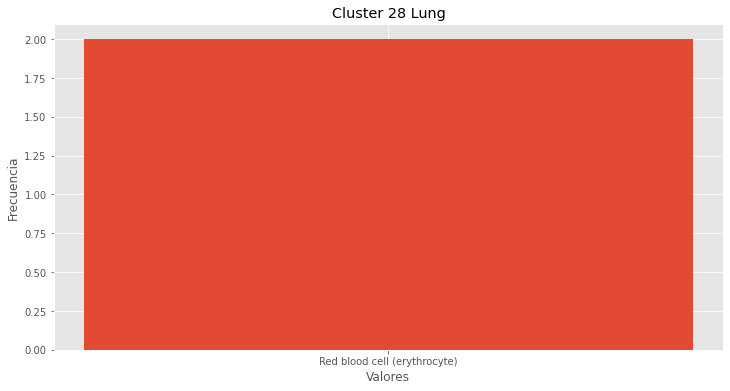

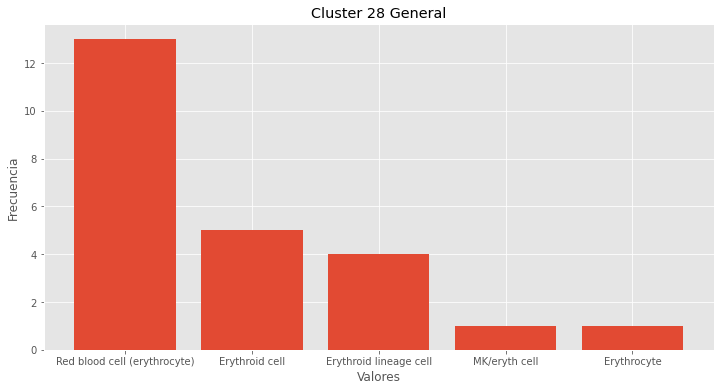

In [120]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 28 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 28 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [121]:
df_temp = df[['species', 'tissue_type', 'cell_type', 'cell_name', 'marker']][(df['marker']=='JCHAIN')|
                                                                (df['marker']=='IRF7')|
                                                                (df['marker']=='GZMB')|
                                                                (df['marker']=='PLD4')|
                                                                (df['marker']=='IRF8')]#|
                                                                #(df['marker']=='')|
                                                                #(df['marker']=='')]
                                                                #(df['marker']=='')]
df_temp[df_temp['tissue_type'] == 'Lung']

,species,tissue_type,cell_type,cell_name,marker
18201,Human,Lung,Normal cell,Plasmacytoid dendritic cell(pDC),IRF8
18334,Human,Lung,Normal cell,Cytotoxic T cell,GZMB
18383,Human,Lung,Normal cell,Plasma cell,JCHAIN
18608,Human,Lung,Normal cell,T cell,JCHAIN
19297,Human,Lung,Normal cell,Plasma cell,JCHAIN
19668,Human,Lung,Normal cell,Dendritic cell,IRF7
19970,Human,Lung,Normal cell,Plasma cell,JCHAIN


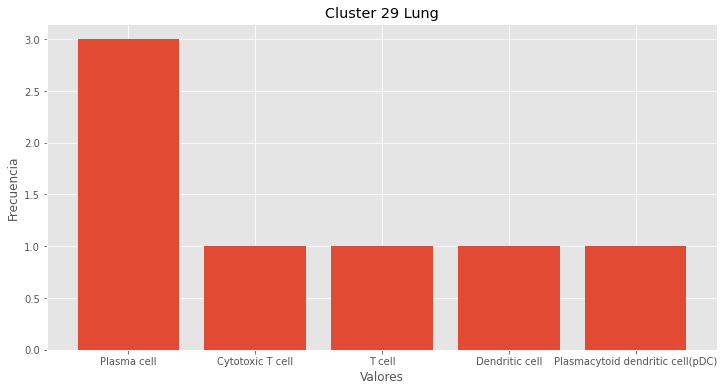

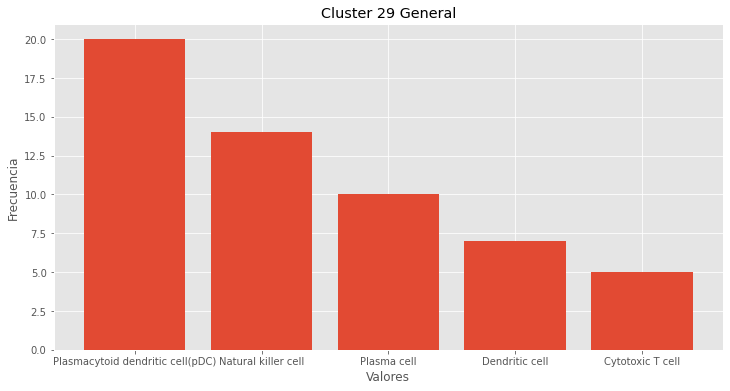

In [122]:
# ONLY LUNG
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'][df_temp['tissue_type'] == 'Lung'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 29 Lung')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# GENERAL
# Contar la frecuencia de cada valor en la columna
frecuencias = df_temp['cell_name'].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5 = frecuencias[:5]

# Crear el gráfico de barras solo con los 5 valores más frecuentes
plt.figure(figsize=(12,6))
plt.bar(top_5.index, top_5.values)

# Agregar título y etiquetas de eje
plt.title('Cluster 29 General')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [134]:
df_lung = df[df['tissue_type']=='Lung']

In [139]:
df_lung['cell_name'].describe()

count            588
unique            83
top       Macrophage
freq              47
Name: cell_name, dtype: object

In [148]:
df_lung['cell_name'].value_counts()[:45]

Macrophage                          47
Epithelial cell                     45
Monocyte                            35
T cell                              33
Natural killer cell                 27
B cell                              25
Pan-endothelial cell                24
Endothelial cell                    21
Neutrophil                          20
Lymphocyte                          19
Fibroblast                          13
Myofibroblast                       12
Alveolar macrophage                 10
Plasma cell                          9
Dendritic cell                       9
CD8+ T cell                          9
Ciliated cell                        8
Immune cell                          8
Stromal cell                         8
Pericyte                             7
Panvascular cell                     7
Vascular cell                        7
Regulatory T(Treg) cell              6
CD8 T cell                           6
Goblet cell                          6
CD4 T cell               

In [150]:
df_lung['cell_name'].value_counts()[44:]

CD4+ T cell                               4
Basal epithelial cell                     3
Myeloid cell                              3
Cytotoxic T cell                          3
Alveolar pneumocyte Type I                3
Stem cell                                 3
Ionocyte                                  3
Bud tip progenitor cell                   3
Neuroendocrine cell                       2
Conventional dendritic cell 1(cDC1)       2
Proliferative cell                        2
Aerocyte                                  2
Club cell (Clara cell)                    2
Lymphangioleiomyomatosis cell(LAMcore)    2
T helper 17(Th17) cell                    2
Conventional dendritic cell 2(cDC2)       2
Dividing cell                             2
Muscularis cell                           2
M2 macrophage                             2
Basal cell                                2
Cycling cell                              1
Arterial endothelial cell                 1
Naive-like T cell               

In [167]:
df_lung['marker'][df_lung['cell_name'] == 'Alveolar pneumocyte Type I'].value_counts()

CAV1     1
CAV2     1
CLIC5    1
Name: marker, dtype: int64

In [168]:
df_lung['marker'][df_lung['cell_name'] == 'Pulmonary alveolar cell Type 2'].value_counts()

ACE2    1
Name: marker, dtype: int64

In [171]:
df_lung['marker'][df_lung['cell_name'] == 'Alveolar macrophage'].value_counts()

APOE       2
MSR1       1
ALOX5AP    1
CD68       1
GPNMB      1
INHBA      1
APOC1      1
FBP1       1
MARCO      1
Name: marker, dtype: int64

In [175]:
df_lung['marker'][df_lung['cell_name'] == 'Alveolar cell Type 1'].value_counts()

AGER     2
EPCAM    1
SLPI     1
SFTPC    1
Name: marker, dtype: int64

In [174]:
df_lung['marker'][df_lung['cell_name'] == 'Alveolar cell Type 2'].value_counts()

AGER     1
EPCAM    1
SLPI     1
SFTPC    1
Name: marker, dtype: int64

In [181]:
import numpy as np

In [199]:
alveolar_gm = dict()
alveolar_gm['alv'] = ['CAV1',
'CAV2',
'CLIC5',
'ACE2',
'APOE',
'MSR1',
'ALOX5AP',
'CD68',
'GPNMB',
'INHBA',
'APOC1',
'FBP1',
'MARCO',
'AGER',
'EPCAM',
'SLPI',
'SFTPC',
'SFTPC',
'SFTPB',
'ABCA3',
'LAMP3',
'MUC1',
'PGC',
'SFTA3',
'WIF1',
'SFTPC']

In [201]:
alveolar_gm = dict()
alveolar_gm['alv'] = ['CAV1', 'CAV2', 'CLIC5', 'ACE2', 'APOE', 'MSR1', 'ALOX5AP', 'CD68',
       'GPNMB', 'INHBA', 'APOC1', 'FBP1', 'MARCO', 'AGER', 'EPCAM',
       'SLPI', 'SFTPC', 'SFTPB', 'ABCA3', 'LAMP3', 'MUC1', 'PGC', 'SFTA3',
       'WIF1']

In [203]:
alveolar_gm['alv']

['CAV1',
 'CAV2',
 'CLIC5',
 'ACE2',
 'APOE',
 'MSR1',
 'ALOX5AP',
 'CD68',
 'GPNMB',
 'INHBA',
 'APOC1',
 'FBP1',
 'MARCO',
 'AGER',
 'EPCAM',
 'SLPI',
 'SFTPC',
 'SFTPB',
 'ABCA3',
 'LAMP3',
 'MUC1',
 'PGC',
 'SFTA3',
 'WIF1']

In [204]:
alv_gm = alveolar_gm['alv'].unique()

AttributeError: 'list' object has no attribute 'unique'

In [196]:
alv_gm

array(['CAV1', 'CAV2', 'CLIC5', 'ACE2', 'APOE', 'MSR1', 'ALOX5AP', 'CD68',
       'GPNMB', 'INHBA', 'APOC1', 'FBP1', 'MARCO', 'AGER', 'EPCAM',
       'SLPI', 'SFTPC', 'SFTPB', 'ABCA3', 'LAMP3', 'MUC1', 'PGC', 'SFTA3',
       'WIF1'], dtype=object)

In [173]:
df_lung['marker'][df_lung['cell_name'] == 'Alveolar type II (ATII) cell'].value_counts()


SFTPC    2
SFTPB    1
ABCA3    1
LAMP3    1
MUC1     1
Name: marker, dtype: int64

In [169]:
df_lung['marker'][df_lung['cell_name'] == 'Alveolar pneumocyte Type II'].value_counts()

PGC      1
SFTA3    1
WIF1     1
SFTPC    1
Name: marker, dtype: int64